# CLUSTERING ANALYSIS

Understanding and Implementing K-Means, Hierarchical, and DBSCAN Algorithms

Objective:
The objective of this assignment is to introduce to various clustering algorithms, including K-Means, hierarchical, and DBSCAN, and provide hands-on experience in applying these techniques to a real-world dataset.


Datasets :


Data Preprocessing:


1.	Preprocess the dataset to handle missing values, remove outliers, and scale the features if necessary.


2.	Perform exploratory data analysis (EDA) to gain insights into the distribution of data and identify potential clusters.


3.	Use multiple visualizations to understand the hidden patterns in the dataset


In [6]:
# --- Import Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram

In [7]:
# ---Load Dataset---
data = pd.read_excel("EastWestAirlines.xlsx", sheet_name="data")
print(data.head())#first 5 rows
print(data.info())#information of the data

   ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0            1                  0                0               7000       0  
1            2                  0                0               6968       0  
2            4                  0                0               7034       0  
3            1                  0                0               6952       0  
4           26               2077                4               6935       1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 en

In [8]:
# ---Preprocessing ---
# Drop non-numeric or ID columns
if 'ID#' in data.columns:
    data = data.drop('ID#', axis=1)

In [9]:
#check missing values
data.isnull().sum() #There is 0 missing values

,0
Balance,0
Qual_miles,0
cc1_miles,0
cc2_miles,0
cc3_miles,0
Bonus_miles,0
Bonus_trans,0
Flight_miles_12mo,0
Flight_trans_12,0
Days_since_enroll,0


In [10]:
#check duplicates
data.duplicated().sum() #There is 1 duplicates

np.int64(1)

In [11]:
#dropping duplicate
data = data.drop_duplicates()

In [12]:
data.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3.998000e+03,3998.000000,3998.00000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,7.361949e+04,144.150575,2.05978,1.014507,1.012256,17149.134567,11.604802,460.170835,1.373937,4119.190095,0.370435
std,1.007817e+05,773.757220,1.37699,0.147669,0.195265,24152.465996,9.603258,1400.365407,3.793585,2065.007629,0.482982
min,0.000000e+00,0.000000,1.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,1.853425e+04,0.000000,1.00000,1.000000,1.000000,1250.000000,3.000000,0.000000,0.000000,2331.250000,0.000000
50%,4.313800e+04,0.000000,1.00000,1.000000,1.000000,7183.000000,12.000000,0.000000,0.000000,4097.500000,0.000000
75%,9.240500e+04,0.000000,3.00000,1.000000,1.000000,23810.750000,17.000000,313.500000,1.000000,5790.750000,1.000000
max,1.704838e+06,11148.000000,5.00000,3.000000,5.000000,263685.000000,86.000000,30817.000000,53.000000,8296.000000,1.000000


<Axes: >

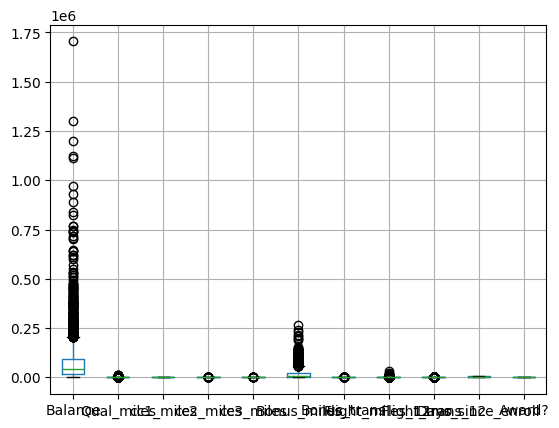

In [13]:
data.boxplot() ##We can visualize outliers using boxplot

In [14]:
def outlier_capping(df2, col): #outlier_apping using Quantiles and Inter Quantile range
    Q1, Q3 = df2[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5  * IQR
    df2[col] = df2[col].clip(lower, upper)   # directly cap values using clip()

for col in data.select_dtypes(include=['int', 'float']).columns:
    outlier_capping(data, col)

<Axes: >

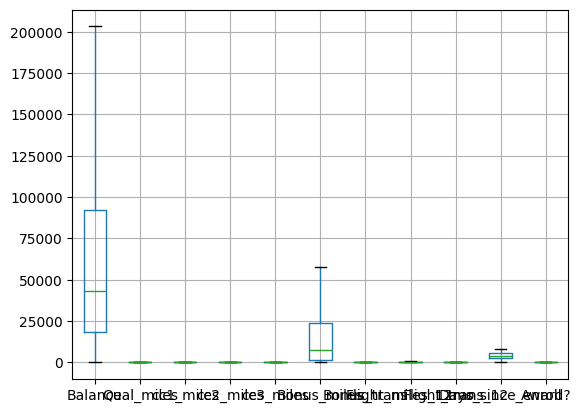

In [15]:
data.boxplot()#no outliers

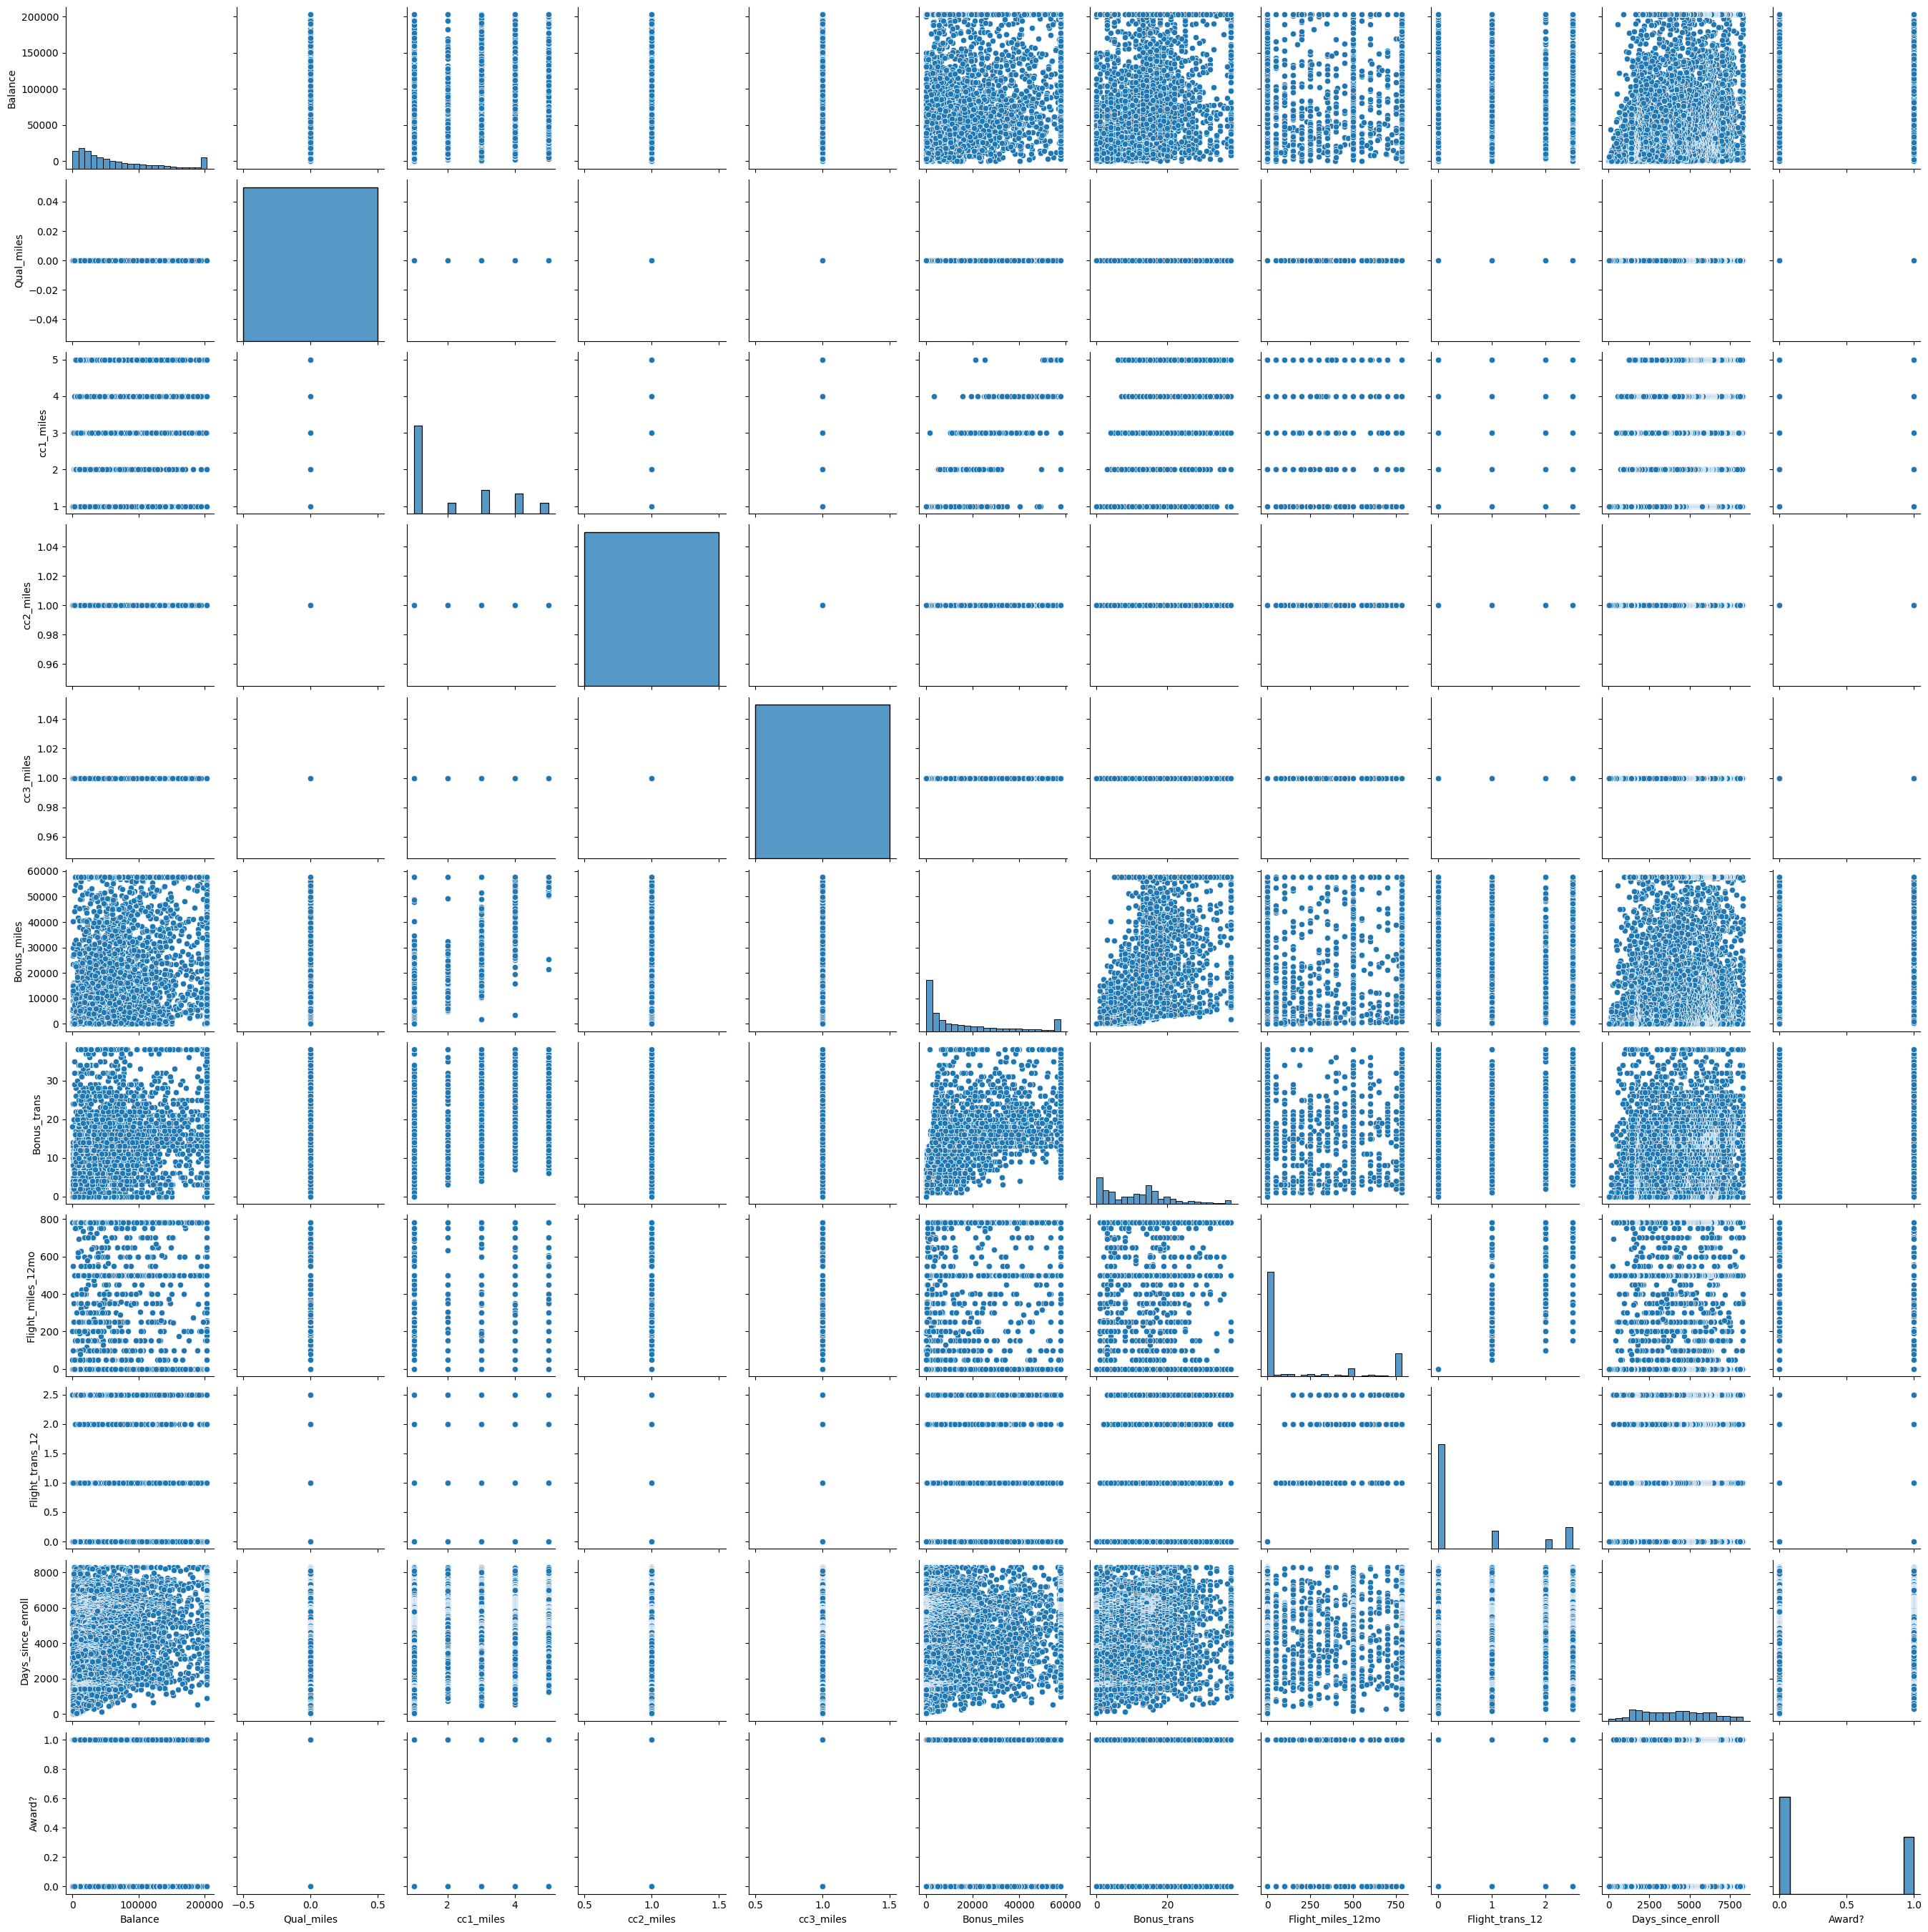

In [16]:
#Draw scatter plot for data distribution
sns.pairplot(data)
plt.show()

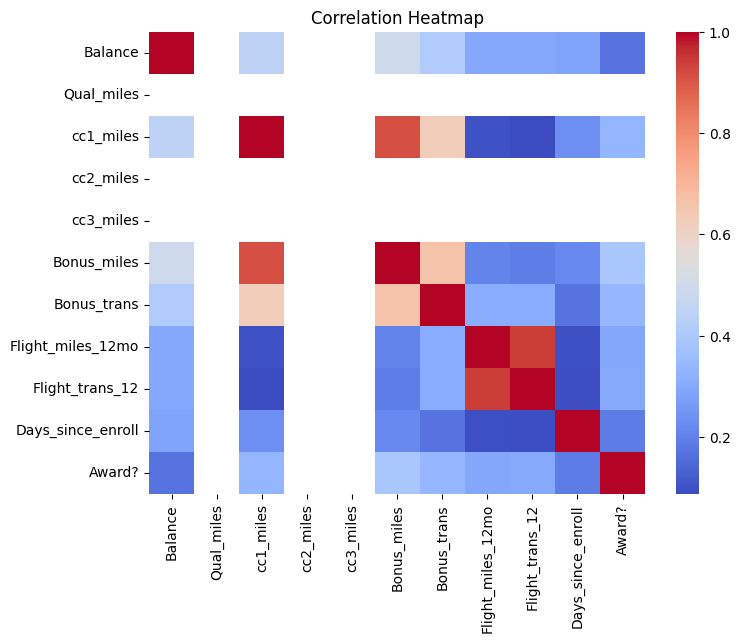

In [17]:
# --- Exploratory Data Analysis ---
plt.figure(figsize=(8,6))
sns.heatmap(pd.DataFrame(data, columns=data.columns).corr(), annot=False,cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [18]:
std_sca=StandardScaler() ## Calling standardscalar() package using std_sca
data1=pd.DataFrame(std_sca.fit_transform(data),columns=data.columns) #fitting our dataset columns for transforming into standard format
data1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.607541,0.0,-0.769732,0.0,0.0,-0.843179,-1.149253,-0.603723,-0.626252,1.395235,-0.767072
1,-0.759235,0.0,-0.769732,0.0,0.0,-0.840911,-1.039523,-0.603723,-0.626252,1.379736,-0.767072
2,-0.382343,0.0,-0.769732,0.0,0.0,-0.624728,-0.820064,-0.603723,-0.626252,1.411702,-0.767072
3,-0.835397,0.0,-0.769732,0.0,0.0,-0.825145,-1.149253,-0.603723,-0.626252,1.371987,-0.767072
4,0.579028,0.0,1.409207,0.0,0.0,1.542468,1.593991,2.039825,2.019866,1.363754,1.303659


In [19]:
### Implement of PCA
from sklearn.decomposition import PCA ##importing PCA from sklearn package

In [20]:
pca=PCA(n_components=7) ##top 10 columns is n_components=10
pca.fit(data1) ## fit our standardized data in pca()

PCA(n_components=7)

In [21]:
New_data=pca.transform(data1) #now, transforming our fitted PCA data
New_data.shape

(3998, 7)

Implementing Clustering Algorithms:


•	Implement the K-Means, hierarchical, and DBSCAN algorithms using a programming language such as Python with libraries like scikit-learn or MATLAB.


•	Apply each clustering algorithm to the pre-processed dataset to identify clusters within the data.


•	Experiment with different parameter settings for hierarchical clustering (e.g., linkage criteria), K-means (Elbow curve for different K values) and DBSCAN (e.g., epsilon, minPts) and evaluate the clustering results.


Cluster Analysis and Interpretation:


•	Analyse the clusters generated by each clustering algorithm and interpret the characteristics of each cluster. Write you insights in few comments.


In [39]:
# ---K-Means Clustering ---
# Elbow Method to choose optimal k
# Within-Cluster-Sum of Squares
inertia = []
K = range(2,11)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(New_data)
    inertia.append(km.inertia_)

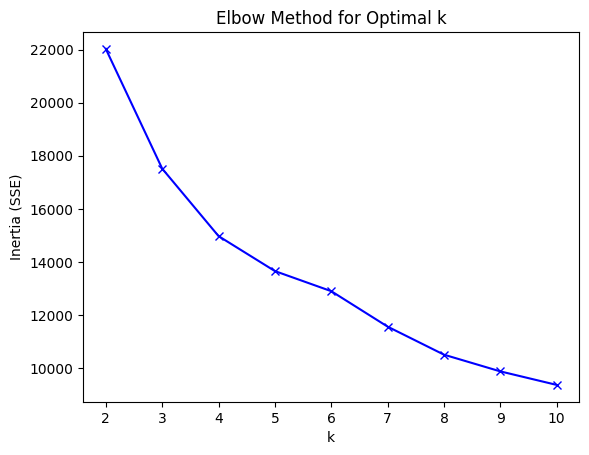

In [40]:
plt.plot(K, inertia, 'bx-')
plt.xlabel("k")
plt.ylabel("Inertia (SSE)")
plt.title("Elbow Method for Optimal k")
plt.show()

In [41]:
# Fit KMeans with chosen k (say k=5 from elbow)
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(New_data)
print("K-Means Silhouette Score:", silhouette_score(New_data, kmeans_labels))

K-Means Silhouette Score: 0.25044516608203277


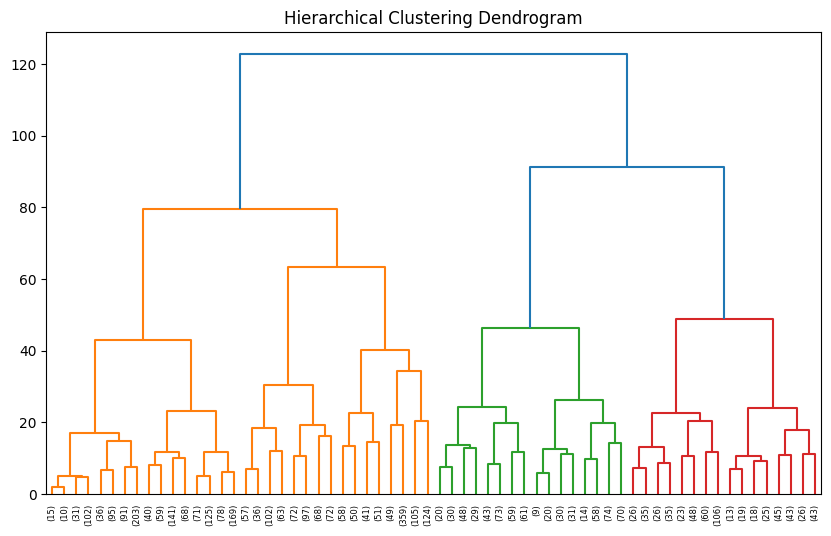

In [42]:
# ---  Hierarchical Clustering ---
linked = linkage(New_data, method='ward')
plt.figure(figsize=(10,6))
dendrogram(linked, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()

In [43]:
hc = AgglomerativeClustering(n_clusters=5, linkage='ward') ## Hierarchical clustering silhouette score
hc_labels = hc.fit_predict(New_data)
print("Hierarchical Silhouette Score:", silhouette_score(New_data, hc_labels))

Hierarchical Silhouette Score: 0.2514237638539815


In [44]:
# --- DBSCAN ---
db = DBSCAN(eps=2, min_samples=5)
db_labels = db.fit_predict(New_data)

# Check number of clusters found (ignoring noise = -1)
n_clusters_db = len(set(db_labels)) - (1 if -1 in db_labels else 0)
print("DBSCAN clusters:", n_clusters_db)

DBSCAN clusters: 2


In [45]:
# Evaluation (only if >1 cluster found)
if n_clusters_db > 1:
    print("DBSCAN Silhouette Score:", silhouette_score(New_data, db_labels))

DBSCAN Silhouette Score: 0.21582992562901085


Cluster Analysis and Interpretation:


•	Analyse the clusters generated by each clustering algorithm and interpret the characteristics of each cluster. Write you insights in few comments.


In [50]:
'''' ###  Cluster Analysis & Interpretation
- **KMeans**: Produces well-separated spherical clusters. Silhouette Score helps confirm cluster quality.
- **Hierarchical**: Dendrogram helps visualize merging process. Useful for understanding data structure.
- **DBSCAN**: Detects arbitrary shapes and noise. Good for datasets with non-spherical clusters.

Each algorithm has strengths. KMeans works best when clusters are compact, Hierarchical is good for nested structures, and DBSCAN is robust to noise and irregular shapes.'''

"' ###  Cluster Analysis & Interpretation\n- **KMeans**: Produces well-separated spherical clusters. Silhouette Score helps confirm cluster quality.\n- **Hierarchical**: Dendrogram helps visualize merging process. Useful for understanding data structure.\n- **DBSCAN**: Detects arbitrary shapes and noise. Good for datasets with non-spherical clusters.\n\nEach algorithm has strengths. KMeans works best when clusters are compact, Hierarchical is good for nested structures, and DBSCAN is robust to noise and irregular shapes."

Visualization:


Visualize the clustering results using scatter plots or other suitable visualization techniques.


Plot the clusters with different colours to visualize the separation of data points belonging to different clusters.


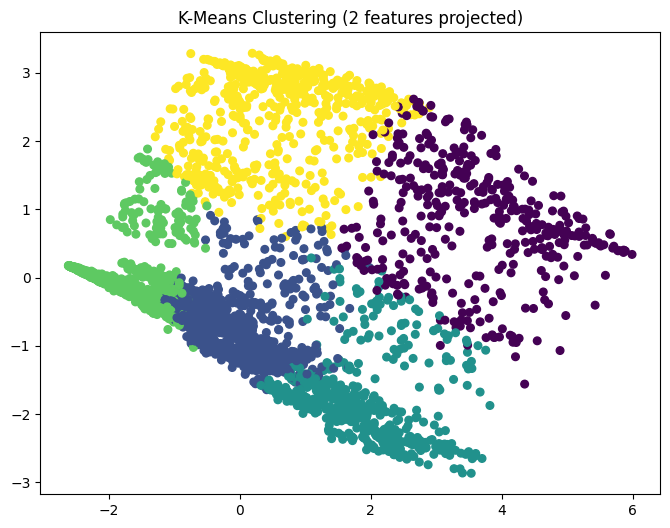

In [46]:
# --- Visualization ---
plt.figure(figsize=(8,6))
plt.scatter(New_data[:,0], New_data[:,1], c=kmeans_labels, cmap='viridis', s=30)
plt.title("K-Means Clustering (2 features projected)")
plt.show()

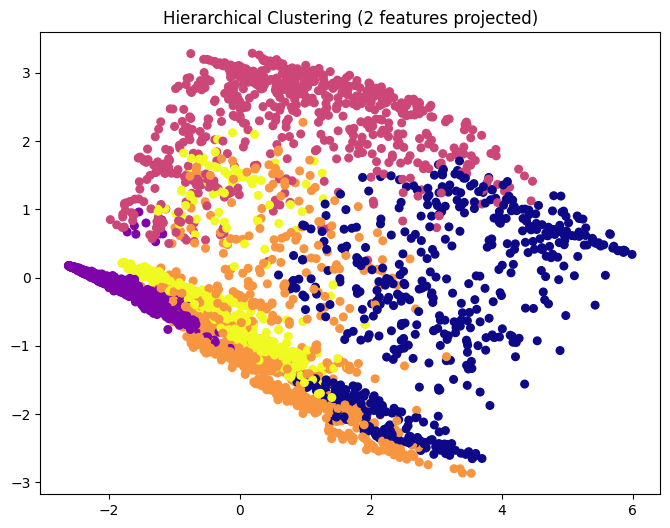

In [47]:
plt.figure(figsize=(8,6))
plt.scatter(New_data[:,0], New_data[:,1], c=hc_labels, cmap='plasma', s=30)
plt.title("Hierarchical Clustering (2 features projected)")
plt.show()

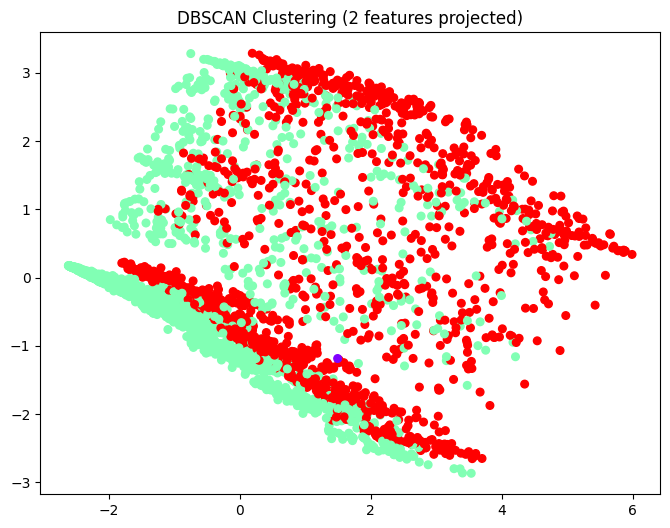

In [48]:
plt.figure(figsize=(8,6))
plt.scatter(New_data[:,0], New_data[:,1], c=db_labels, cmap='rainbow', s=30)
plt.title("DBSCAN Clustering (2 features projected)")
plt.show()

Evaluation and Performance Metrics:


Evaluate the quality of clustering using internal evaluation metrics such as silhouette score for K-Means and DBSCAN.


In [49]:
# --- Evaluation & Performance Metrics ---

results = {}

# KMeans Silhouette
results['KMeans'] = kmeans_labels

# Hierarchical Silhouette
results['Hierarchical'] = hc_labels

# DBSCAN Silhouette (only if valid)
if len(set(db_labels)) > 1 and -1 not in set(db_labels):
    results['DBSCAN'] = silhouette_score(New_data, db_labels)
else:
    results['DBSCAN'] = "Not Applicable (too much noise or single cluster)"

# Display results
print("📊 Clustering Evaluation Results (Silhouette Scores):")
for algo, score in results.items():
    print(f"{algo}: {score}")

📊 Clustering Evaluation Results (Silhouette Scores):
KMeans: [3 3 3 ... 1 3 3]
Hierarchical: [1 1 1 ... 4 2 1]
DBSCAN: Not Applicable (too much noise or single cluster)
